In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [1]:

from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
import ipywidgets as widgets
from IPython.display import display

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import random

from PIL import Image
import imageio
import datetime

import scipy.misc
import cv2
import time

sys.path.append('../')
from pytvision.transforms import transforms as mtrans
from pytvision.transforms.render import ColorCheckerRender
from pytvision.transforms.aumentation import ObjectImageMaskAndWeightTransform, ObjectImageTransform, ObjectImageAndMaskTransform
from pytvision.datasets.utility import to_rgb

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode


In [75]:
def showimage(image, title='image', figsize=(14,14)):
    plt.figure( figsize=figsize )
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()


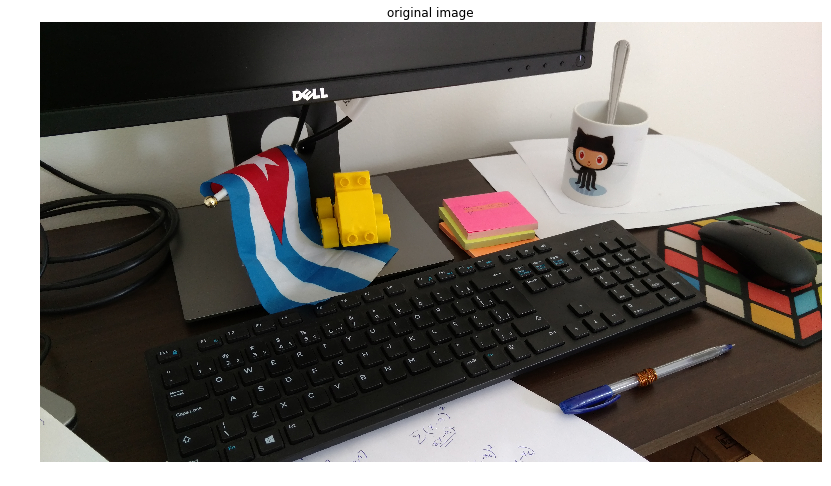

In [77]:
image = cv2.imread('../rec/image.jpg')[:,:,(2,1,0)]
showimage(image, title='original image')

# Color transformation

## Brightness

In [98]:
def brightness(image, alpha):
    obj = ObjectImageTransform( image )
    obj.brightness( alpha )
    showimage( obj.image, title='brightness' )

walpha = widgets.FloatSlider( value=1, base=10, min=0.0, max=2.0,  step=0.1, description='alpha')
display(walpha)

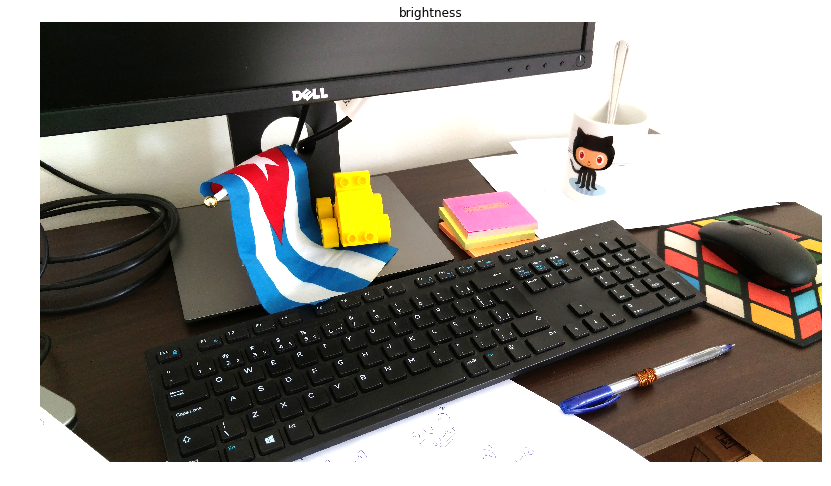

In [99]:
brightness( image, walpha.value )

# Multiples color transformation

In [201]:
def color_tranformation(image, pbrightness, pcontrast, psaturation, pgamma ):    
    
    obj = ObjectImageTransform( image )
    obj.brightness( pbrightness )
    obj.contrast( pcontrast )    
    obj.saturation( psaturation )
    obj.gamma_correction( pgamma )
    
    showimage( obj.image, title='color transformation' )

wbrightness = widgets.FloatSlider( value=1, base=10, min=0.0, max=2.0,  step=0.1, description='bright')
wcontrast = widgets.FloatSlider( value=1, base=10, min=0.7, max=1.3,  step=0.1, description='contrast')
wsaturation = widgets.FloatSlider( value=1, base=10, min=0.25, max=1.75,  step=0.1, description='saturation')
wgamma = widgets.FloatSlider( value=1, base=10, min=0.5, max=1.5,  step=0.1, description='gamma')


display(wbrightness, wcontrast, wsaturation, wgamma)

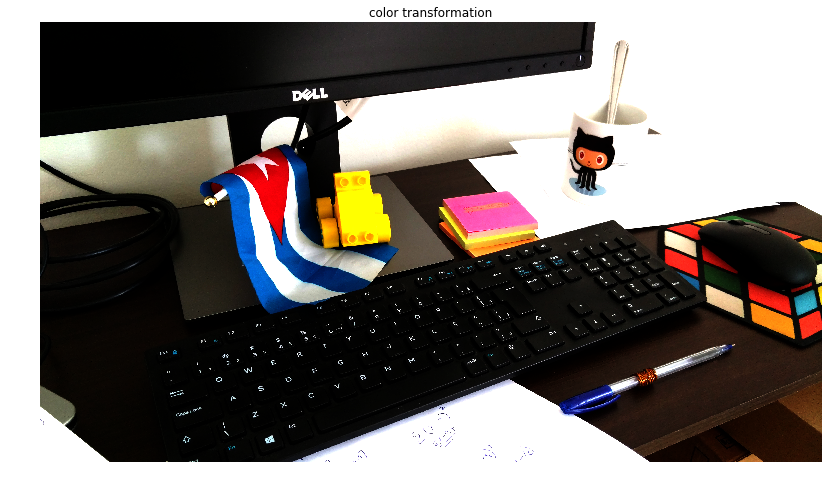

In [142]:
color_tranformation( image, wbrightness.value, wcontrast.value, wsaturation.value, wgamma.value )

# Geometrical transformation

In [214]:
from pytvision.transforms.transforms import RandomGeometricalTransform

def geometrical(image, pangle, ptranslation, pwarp, ppadding ):    
    
    imsize = image.shape
    obj = ObjectImageTransform( image )
    geo_tranf = RandomGeometricalTransform( 
        angle=pangle, 
        translation=ptranslation, 
        warp=pwarp, 
        padding_mode=ppadding
        )
    obj = geo_tranf(obj)
    showimage( obj.image, title='color transformation' )

    
lpandding = {
    'CONSTANT': cv2.BORDER_CONSTANT, 
    'ISOLATED': cv2.BORDER_ISOLATED, 
    'REPLICATE': cv2.BORDER_REPLICATE,
    'REFLECT_101': cv2.BORDER_REFLECT_101,
    'REFLECT101': cv2.BORDER_REFLECT101,
    'REFLECT': cv2.BORDER_REFLECT,
    'WRAP': cv2.BORDER_WRAP
    }    

wangle = widgets.FloatSlider( value=45, base=10, min=0, max=360,  step=1, description='angle')
wtranslation = widgets.FloatSlider( value=.0, base=10, min=0.0, max=2.0,  step=0.1, description='translate')
wwarp = widgets.FloatSlider( value=0.02, base=10, min=0.0, max=1.0,  step=0.1, description='warp')

wpadding = widgets.Dropdown( options=lpandding, value=cv2.BORDER_CONSTANT, description='padding' )


display(wangle, wtranslation, wwarp, wpadding )

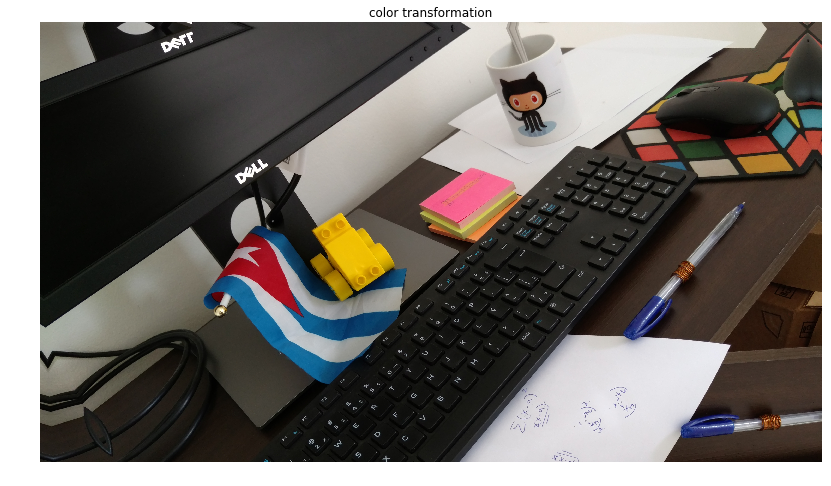

In [220]:
geometrical(image, wangle.value, wtranslation.value, wwarp.value, wpadding.value )

# Motion Blur

In [232]:
from pytvision.transforms.transforms import ToMotionBlur

def blur(image, pSFsize, maxTotalLength, anxiety, numT, texp ):    
    
    imsize = image.shape
    obj = ObjectImageTransform( image )
    blur_tranf = ToMotionBlur( 
        pSFsize=pSFsize,
        maxTotalLength=64,
        anxiety=0.005,
        numT=2000,
        texp=0.75, 
        )
    obj = blur_tranf(obj)
    showimage( obj.image, title='blur transformation' )

wpsfsize = widgets.IntSlider( value=64, base=10, min=0, max=100,  step=1, description='psf size')
wmaxlength = widgets.IntSlider( value=64, base=10, min=0, max=100,  step=1, description='max L')
wanxiety = widgets.FloatSlider( value=0.005, base=10, min=0.0, max=1.0,  step=0.001, description='anxiety')
wnumT = widgets.IntSlider( value=2000, base=10, min=0, max=10000,  step=1, description='num T')
wtexp = widgets.FloatSlider( value=0.75, base=10, min=0.0, max=10.0,  step=0.1, description='texp')

display(wpsfsize, wmaxlength, wanxiety, wnumT, wtexp)


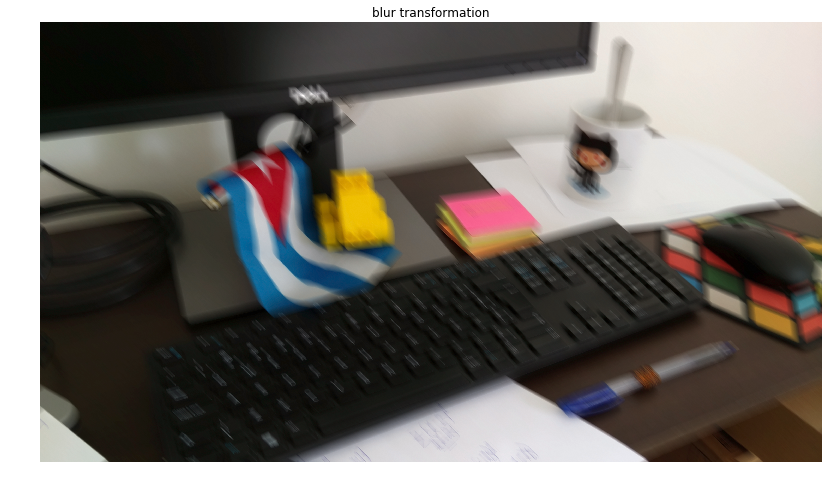

In [235]:
blur(image, wpsfsize.value, wmaxlength.value, wanxiety.value, wnumT.value, wtexp.value )